# Module 3 - Coursera Machine Learning with Python


K-Nearest Neighbors
Estimated time needed: 25 minutes

Objectives
After completing this lab you will be able to:

Use K Nearest neighbors to classify data
In this Lab you will load a customer dataset, fit the data, and use K-Nearest Neighbors to predict a data point. But what is K-Nearest Neighbors?

K-Nearest Neighbors is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.







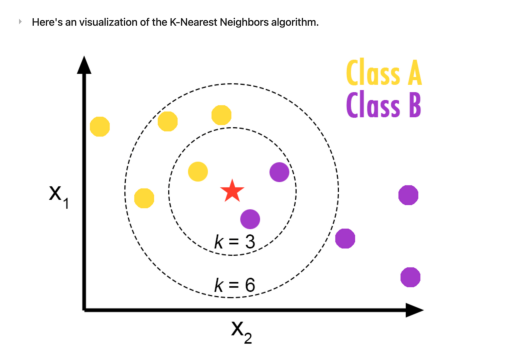

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('knn_fig.png')
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree



About the Data - Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

In [3]:
# Read the data
df = pd.read_csv('teleCust1000t.csv')
df.head()

# Let's see how many customer categories we have in our dataset
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

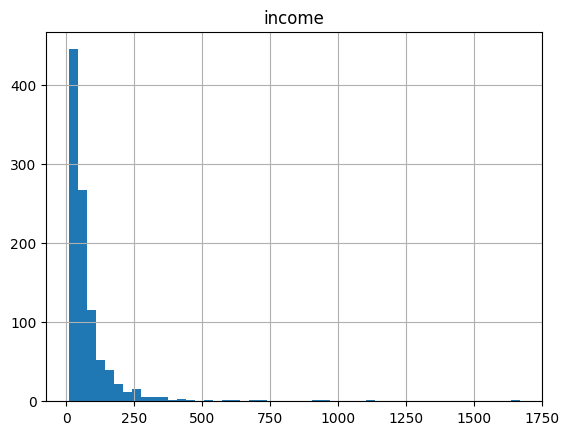

In [4]:
# Let's visualize the data based on income
df.hist(column='income', bins=50)

In [5]:
# Look at the features we have in the data
print(df.columns)
#print(df.info())  # Provides a summary of the DataFrame, including data types and non-null counts
# To use the scikit-learn library we have to convert the Pandas data frame to a Numpy array:
X = df.to_numpy()
print(X.shape)
#print(X[0:5])

# We are going to use custcat as the label we are looking to assign. The values method on a Dataframe returns a NumPy array.
y = df['custcat'].values
print(np.unique(y))




Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')
(1000, 12)
[1 2 3 4]


Train Test Split
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

''' Split the data into training and testing sets keeping in mind the following key points:
1. Split First: Always split data into training and test sets before applying any preprocessing steps like normalization or standardization.
2. Fit on Training Data: Compute normalization parameters (e.g., mean and standard deviation) from the training data only.
3. Transform Both Sets: Apply the same transformation to both the training and test sets using the parameters derived from the training data.'''
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Standardize the training data - The StandardScaler is fitted on the training data to compute the mean and standard deviation. 
# Both the training and test data are transformed using the same scaler, ensuring consistent scaling.
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)

#print(X_train_std)

# Standardize the test data using the same scaler
X_test_std = scaler.transform(X_test)

# Train the kNN classifier using the standardized training data
k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train_std, y_train)

# Predict on the standardized test data
y_pred = neigh.predict(X_test_std)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Train set: (800, 12) (800,)
Test set: (200, 12) (200,)
Accuracy: 0.74


What about other K?
K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose the best value for K? The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k = 1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.

In [7]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_std, y_train)
    yhat = neigh.predict(X_test_std)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    # Calculate Standard Deviation of Accuracy
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)
print(std_acc)

[0.76  0.68  0.715 0.74  0.735 0.75  0.765 0.775 0.75 ]
[0.03019934 0.03298485 0.03191982 0.03101612 0.03120697 0.03061862
 0.02998124 0.02952753 0.03061862]


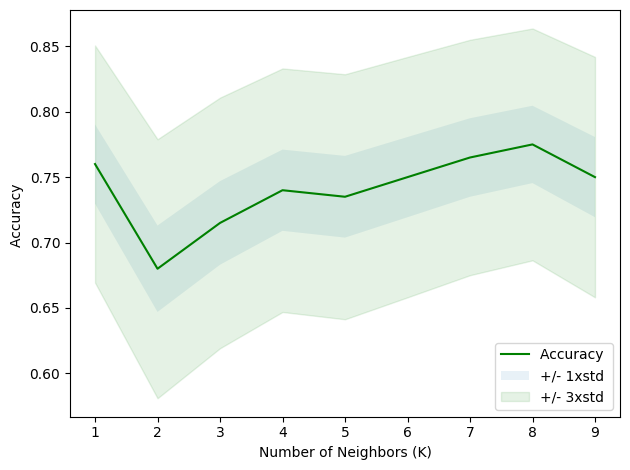

The best accuracy was  0.775 with k =  8


In [8]:
# Plot the model accuracy for a different number of neighbors.
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# argmax() function is a NumPy method that returns the index of the first occurrence of the maximum value in the array. In this case, 
# it returns the index of the highest mean accuracy in the mean_acc array and we add 1 because it is a zero-based index.
print( "The best accuracy was ", mean_acc.max(), "with k = ", mean_acc.argmax()+1)

In [9]:
# Decision Trees - We will use this classification algorithm to build a model from the historical data of patients, and their response to different medications.
# We will train a decision tree to predict the class of an unknown patient or to find a proper drug for a new patient.

''' Given a dataset of patients who all have the same illness. During their course of treatment, each patient responded to one of 5 medications,
Drug A, Drug B, Drug c, Drug x, and Drug y. The goal is to build a model to find out which drug might be appropriate for a future patient with the 
same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that
each patient responded to. It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree 
and then use it to predict the class of an unknown patient, or to prescribe a drug to a new patient.'''

my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:10]





,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [10]:
# Declare X as the Feature Matrix (data of my_data) and y as the response vector (target). 
# Note we remove Drug from X because this is what we want to predict.
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

# DecisionTreeClassifier and DecisionTreeRegressor do not natively handle categorical variables directly. They require all input features 
# to be numeric. However, you can still work with categorical data by preprocessing it into a suitable numeric format.
# We convert these features to numerical values using LabelEncoder to convert the categorical variable into numerical variables.
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

print(X[0:5])

# Define the target variable
y = my_data["Drug"]
y[0:5]

[[23 0 0 0 25.355]
 [47 1 1 0 13.093]
 [47 1 1 0 10.114]
 [28 0 2 0 7.798]
 [61 0 1 0 18.043]]


0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [11]:
# Setting up the Decision Tree - We will be using train/test split on our decision tree. Let's import train_test_split from sklearn.cross_validation.
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

print('Shape of X test set {}'.format(X_testset.shape),'&','Size of y test set {}'.format(y_testset.shape))

# Inside of the classifier specify criterion="entropy" so we can see the information gain of each node.
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
print(drugTree) # Shows the default parameters

# Fit the data with the training feature matrix X_trainset and training response vector y_trainset
drugTree.fit(X_trainset,y_trainset)



Shape of X test set (60, 5) & Size of y test set (60,)
DecisionTreeClassifier(criterion='entropy', max_depth=4)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [12]:
# Make some predictions on the testing dataset and store it into a variable called predTree.
predTree = drugTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [13]:
from sklearn import metrics
import matplotlib.pyplot as plt

accuracy = metrics.accuracy_score(y_testset, predTree)

# Print the accuracy as a percentage with two decimal places
print("DecisionTrees's Accuracy: {:.2f}%".format(accuracy * 100))


DecisionTrees's Accuracy: 98.33%


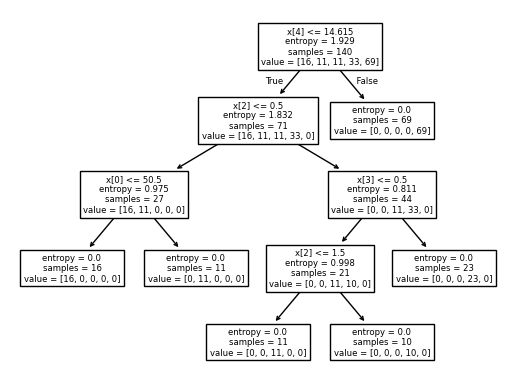

In [14]:
tree.plot_tree(drugTree)
plt.show()

Node 0:
  Feature used for split: Na_to_K
  Threshold: 14.61549997329712
Node 1:
  Feature used for split: BP
  Threshold: 0.5
Node 2:
  Feature used for split: Age
  Threshold: 50.5
Node 5:
  Feature used for split: Cholesterol
  Threshold: 0.5
Node 6:
  Feature used for split: BP
  Threshold: 1.5


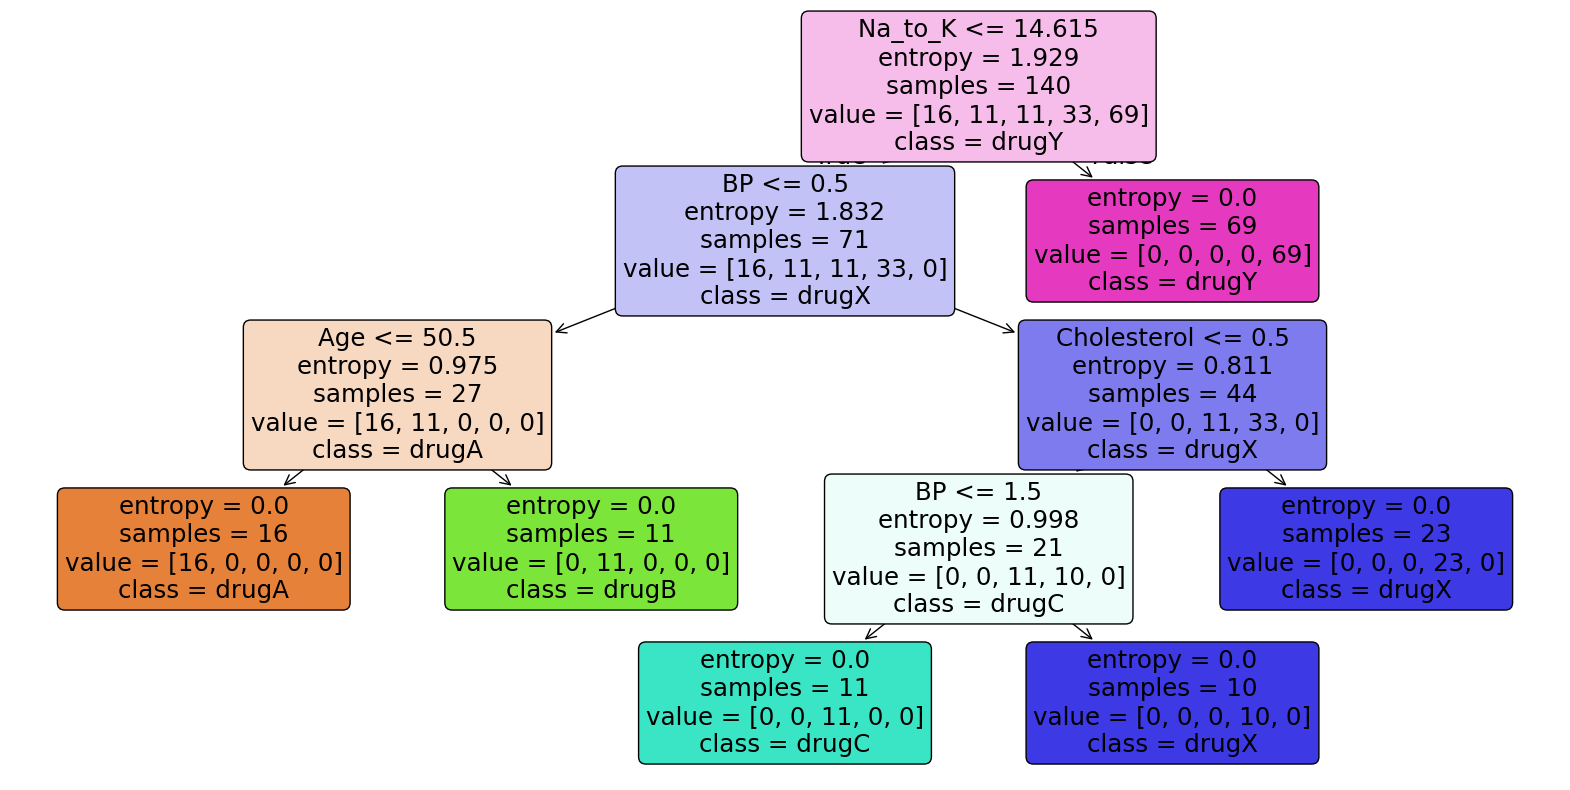

In [16]:
# The plot above is nice, but I want to see which attributes were selected at the node level for splitting.
# Define the feature names based on your dataset.
feature_names = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']

# Access the tree structure
n_nodes = drugTree.tree_.node_count
children_left = drugTree.tree_.children_left
children_right = drugTree.tree_.children_right
feature = drugTree.tree_.feature
threshold = drugTree.tree_.threshold

# Iterate through nodes to print split information
for i in range(n_nodes):
    if children_left[i] != children_right[i]:  # If not a leaf node
        print(f"Node {i}:")
        print(f"  Feature used for split: {feature_names[feature[i]]}")
        print(f"  Threshold: {threshold[i]}")

# Visualize the tree
plt.figure(figsize=(20, 10))
tree.plot_tree(drugTree, filled=True, feature_names=feature_names, class_names=drugTree.classes_, rounded=True)
plt.show()